### Import libraries:

In [3]:
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read file:

In [38]:
FILE_NAME_1 = '/Users/daria/Documents/Бауманка предметы/2 курс/3 семестр/ЯПП/Python/lab_2_py/Cleaned_ships_data.csv'
FILE_NAME_2 = '/Users/daria/Downloads/IRIS.csv'
FILE_NAME_3 = '/Users/daria/Downloads/StudentsPerformance.csv'

In [62]:
ships_data = pd.read_csv(FILE_NAME_1)
iris_data = pd.read_csv(FILE_NAME_2)
students_perfomance_data = pd.read_csv(FILE_NAME_3)

In [22]:
def check_file(file_path):
    if not file_path.endswith('.csv'):
        print('\nThe file has a different extension (not ".csv")!')
        return False
    elif os.path.getsize(file_path) == 0:
        print('\nThere is no data in the file; it is empty!')
        return False
    elif not os.path.exists(file_path):
        print('\nThe file does not exist!')
        return False
    return True

## Task 1:

### Plot graphic 1:

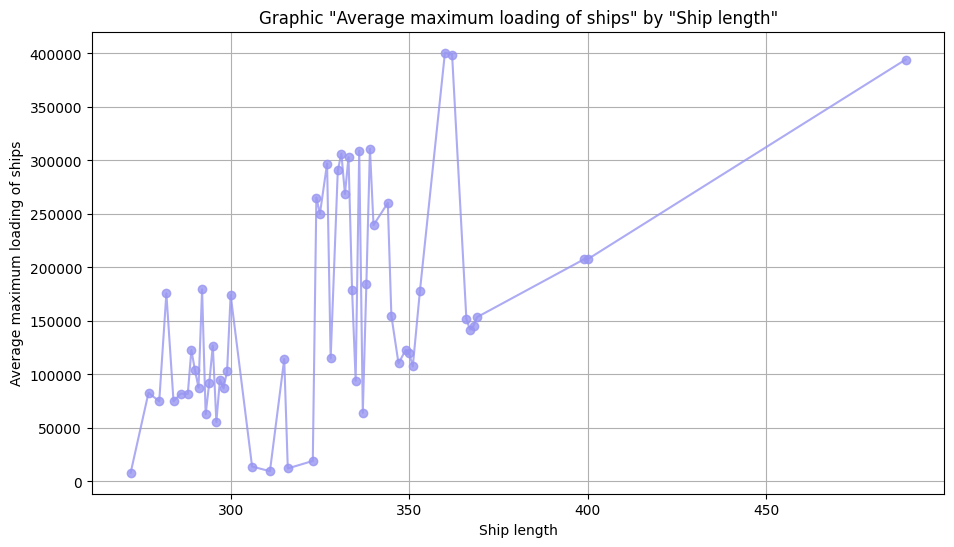

In [40]:
if not(check_file(FILE_NAME_1)):
    print('Error with file!')
else:
    average_max_load = ships_data.groupby('length')['dwt'].mean()
    lengths = average_max_load.index.tolist()
    maximum_dwt_of_ship = average_max_load.tolist()

    plt.figure(figsize=(11, 6))
    plt.plot(lengths, maximum_dwt_of_ships, c='#9896F1', alpha=0.8,  marker='o')
    plt.title('Graphic "Average maximum loading of ships" by "Ship length"')
    plt.xlabel('Ship length')
    plt.ylabel('Average maximum loading of ships')
    plt.grid(True)
    plt.show()


### Plot graphic 2:

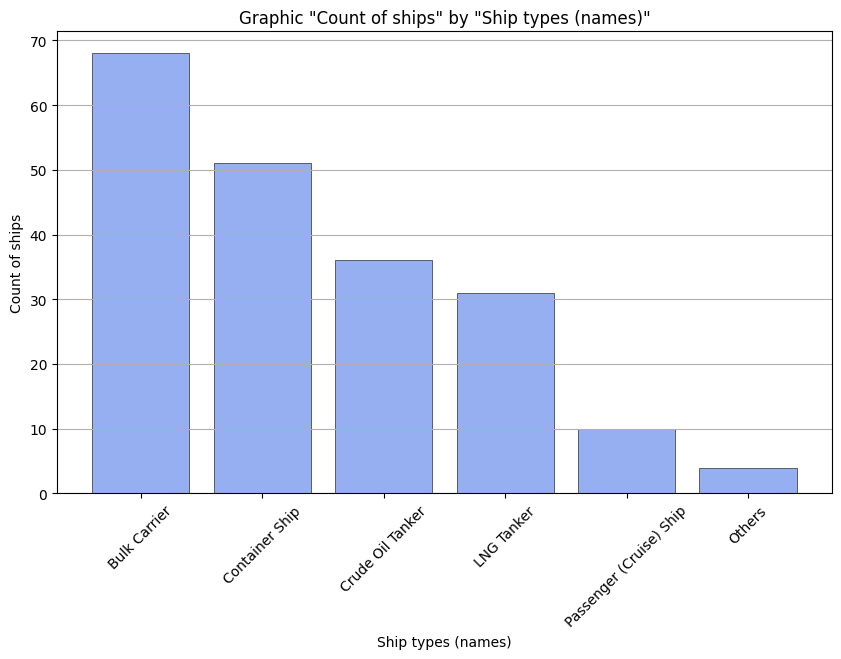

In [50]:
if not(check_file(FILE_NAME_1)):
    print('Error with file!')
else:
    ship_name_counts = ships_data['ship_name'].value_counts()
    threshold = 5
    top_ship_names = ship_name_counts[ship_name_counts >= threshold].index
    ships_data['ship_name_combined'] = ships_data['ship_name'].apply(lambda x: x if x in top_ship_names else 'Others')

    plt.figure(figsize=(10, 6))
    plt.bar(ships_data['ship_name_combined'].value_counts().index, ships_data['ship_name_combined'].value_counts(), color='#96AFF1', edgecolor='black', linewidth=0.4)
    plt.title('Graphic "Count of ships" by "Ship types (names)"')
    plt.xlabel('Ship types (names)')
    plt.ylabel('Count of ships')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.show()

### Plot graphic 3:

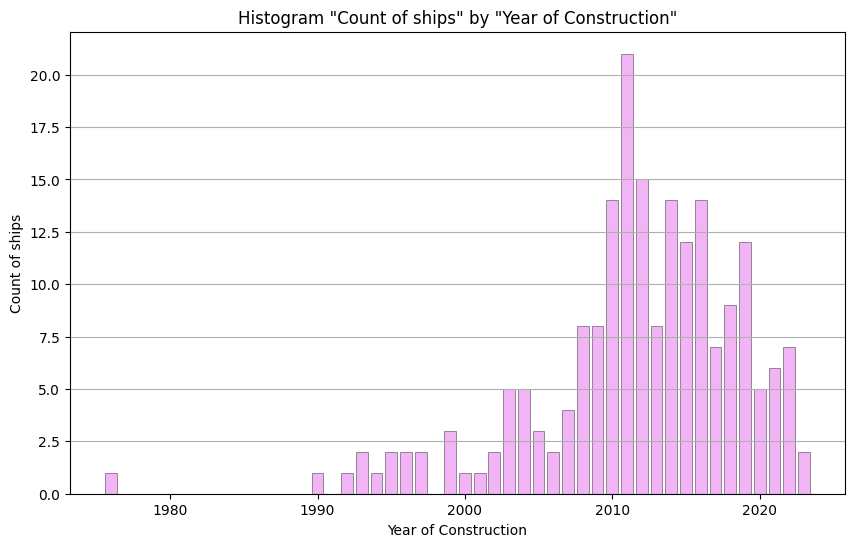

In [75]:
if not(check_file(FILE_NAME_1)):
    print('Error with file!')
else:
    year_counts = ships_data['built_year'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    plt.bar(year_counts.index, year_counts.values, alpha=0.7, color='#EC96F1', edgecolor='black', linewidth=0.4)
    plt.title('Histogram "Count of ships" by "Year of Construction"')
    plt.xlabel('Year of Construction')
    plt.ylabel('Count of ships')
    plt.grid(True, axis='y')
    plt.show()

### Plot graphic 4:

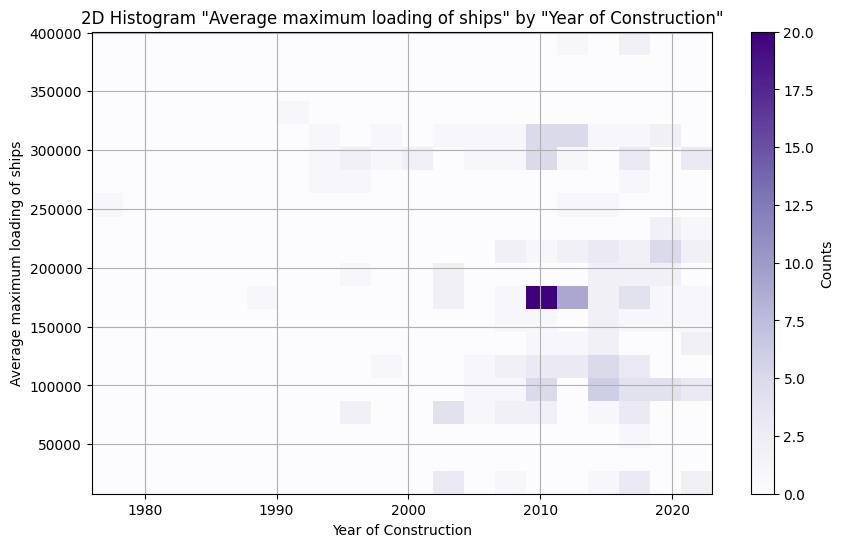

In [53]:
if not(check_file(FILE_NAME_1)):
    print('Error with file!')
else:
    plt.figure(figsize=(10, 6))
    plt.hist2d(ships_data['built_year'], ships_data['dwt'], bins=(20, 20), cmap="Purples")
    plt.title('2D Histogram "Average maximum loading of ships" by "Year of Construction"')
    plt.xlabel('Year of Construction')
    plt.ylabel('Average maximum loading of ships')
    plt.colorbar(label='Counts')
    plt.grid(True)
    plt.show()

### Plot graphic 5:

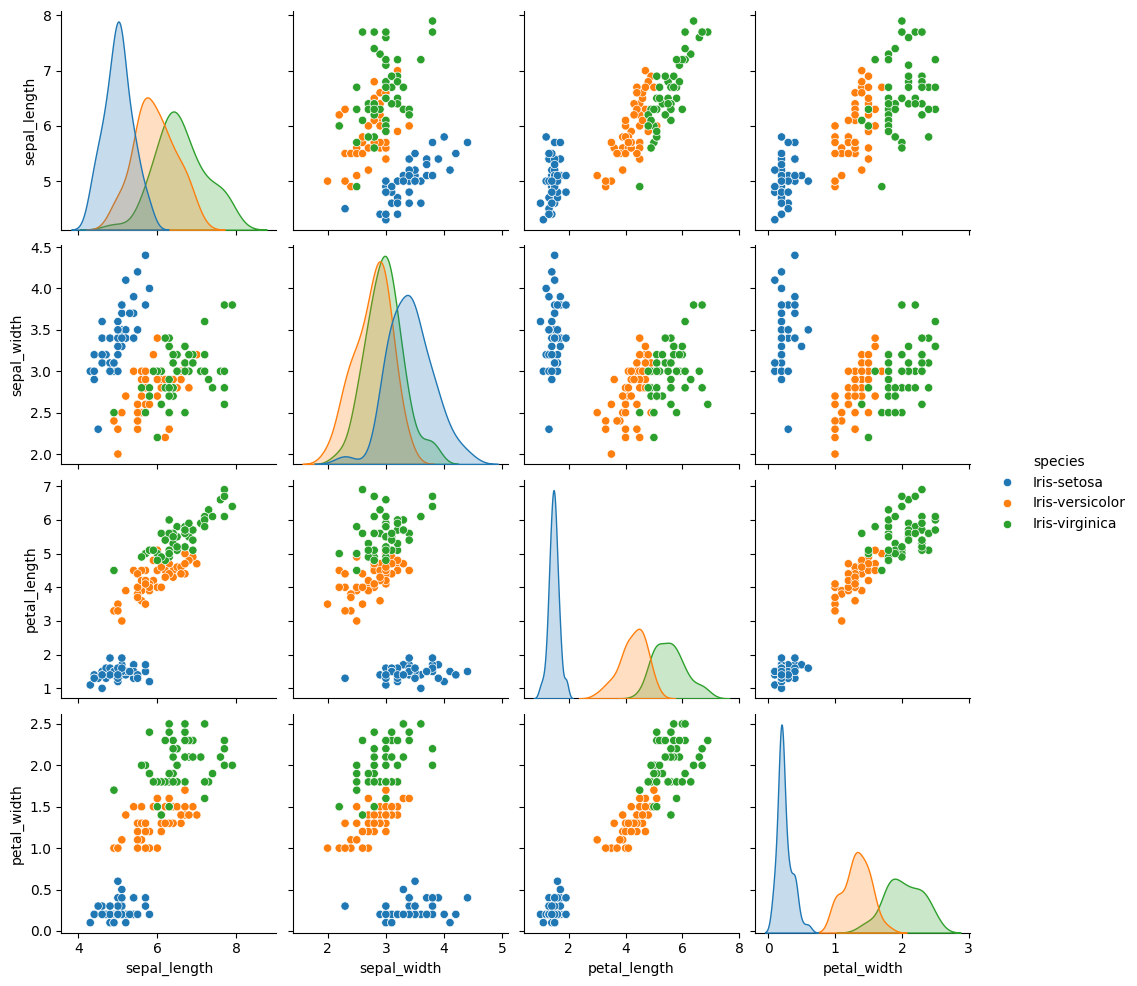

In [55]:
if not(check_file(FILE_NAME_2)):
    print('Error with file!')
else:
    sb.pairplot(data=iris_data, hue='species')
    plt.show()

### Plot graphic 6:

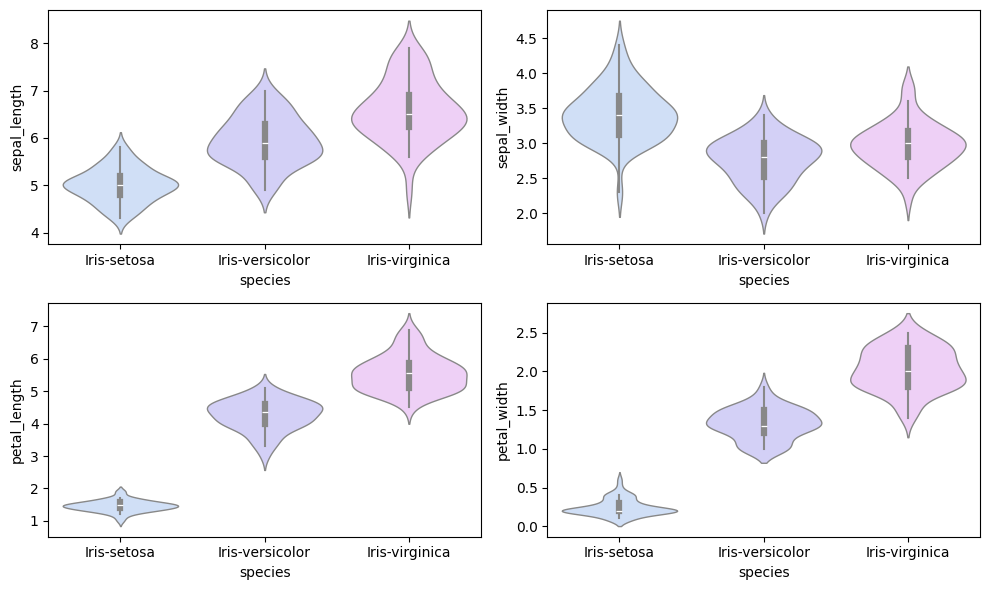

In [66]:
if not(check_file(FILE_NAME_2)):
    print('Error with file!')
else:
    custom_palette = ["#CADEFC", "#CECAFC", "#F2CAFC"]
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    sb.violinplot(iris_data, x="species", y="sepal_length", linewidth=1, palette=custom_palette)
    plt.subplot(2, 2, 2)
    sb.violinplot(iris_data, x="species", y="sepal_width", linewidth=1, palette=custom_palette)
    plt.subplot(2, 2, 3)
    sb.violinplot(iris_data, x="species", y="petal_length", linewidth=1, palette=custom_palette)
    plt.subplot(2, 2, 4)
    sb.violinplot(iris_data, x="species", y="petal_width", linewidth=1, palette=custom_palette)
    plt.tight_layout()
    plt.show()

## Task 2:

### Plot graphic 1:

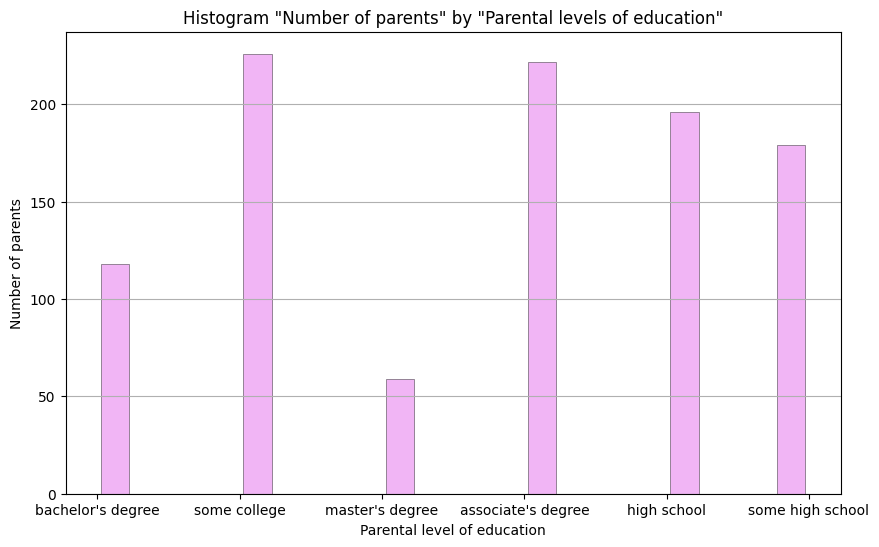

In [70]:
if not(check_file(FILE_NAME_3)):
    print('Error with file!')
else:
    plt.figure(figsize=(10, 6))
    plt.hist(students_perfomance_data['parental level of education'], bins=20, alpha=0.7, rwidth=0.8, color='#EC96F1', edgecolor='black',
                linewidth=0.4)
    plt.title('Histogram "Number of parents" by "Parental levels of education"')
    plt.xlabel('Parental level of education')
    plt.ylabel('Number of parents')
    plt.grid(True, axis='y')
    plt.show()

### Выводы по анализу и построению диаграммы 1:
#### По диаграмме можно увидеть, что по данным, приведённым в таблице:
- большинство родителей имеют среднее специальное образование и закончили хоть какой-нибудь колледж
- чуть в меньшей степени большинство родителей имеют образование степень младшего специалиста
- а самый маленький процент имеет степень магистра, то есть высшее образование

#### По выше сделанным выводам можно предположить, что:
- наибольший процент жителе США имеет среднее специальное среднее образование

### Plot graphic 2:

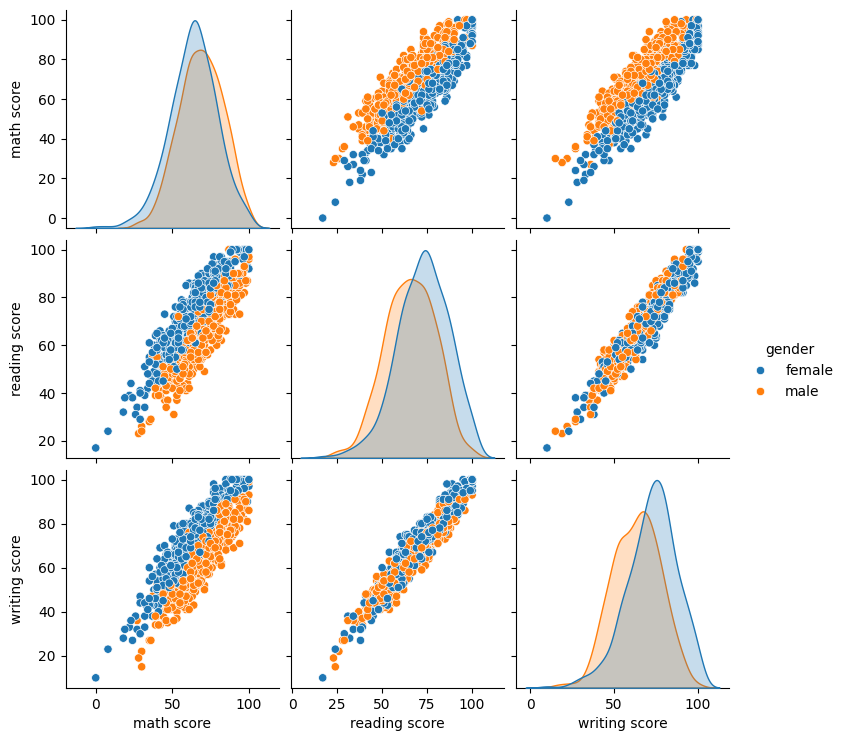

In [77]:
if not(check_file(FILE_NAME_3)):
    print('Error with file!')
else:
    sb.pairplot(data=students_perfomance_data, hue='gender')
    plt.show()

### Выводы по анализу и построению диаграммы 2:
#### По диаграмме можно увидеть, что по данным, приведённым в таблице:
- девочки сдают тест по математики, чтению и русскому языку намного лучше чем мальчики
- самый высокий балл у девочек по математике - 100, а у мальчиков чуть выше 80
- самый высокий балл у девочек по чтению примерно - 97, а у мальчиков чуть выше 90
- самый высокий балл у девочек по русскому языку примерно - 97, а у мальчиков чуть выше 85

#### По выше сделанным выводам можно предположить, что:
- девочки учатся более успешно чем мальчики и имеют более высокие баллы за обучение

### Plot graphic 3:

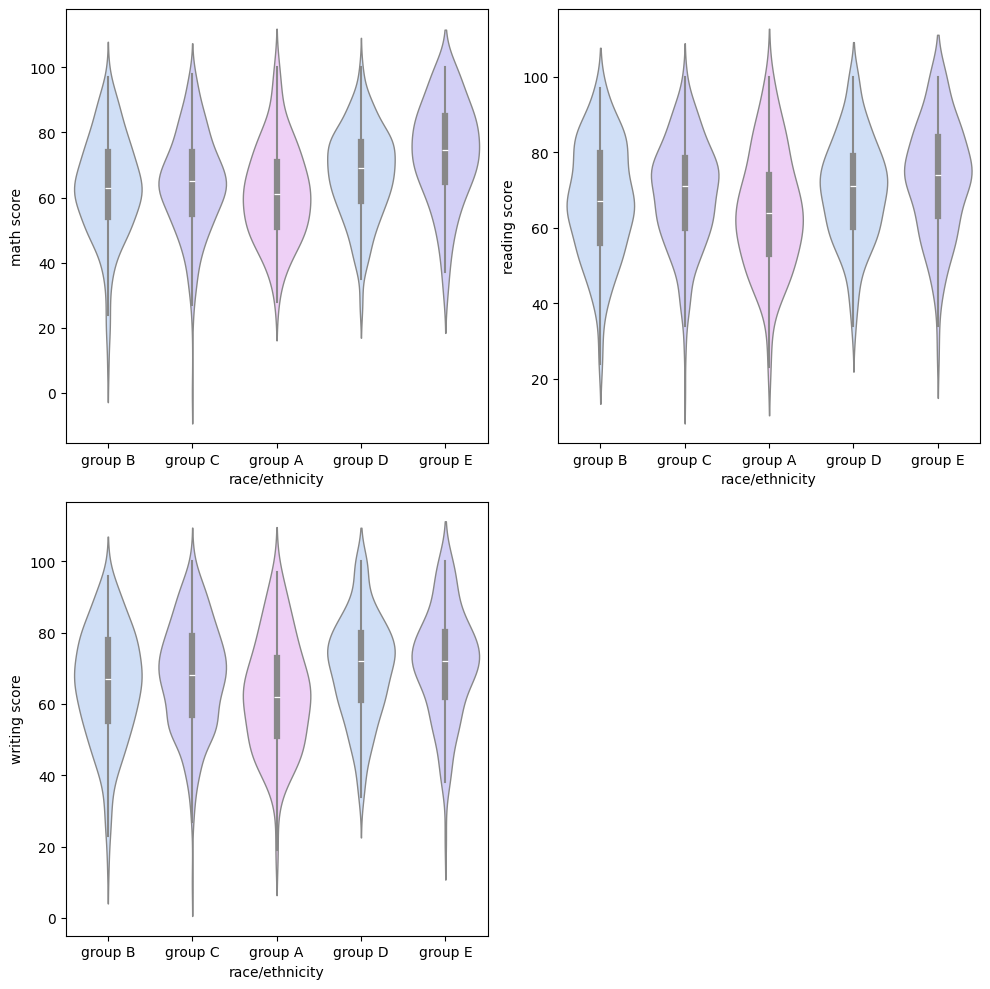

In [89]:
if not(check_file(FILE_NAME_3)):
    print('Error with file!')
else:
    custom_palette = ["#CADEFC", "#CECAFC", "#F2CAFC"]
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    sb.violinplot(students_perfomance_data, x="race/ethnicity", y="math score", linewidth=1, palette=custom_palette)
    plt.tight_layout()
    plt.subplot(2, 2, 2)
    sb.violinplot(students_perfomance_data, x="race/ethnicity", y="reading score", linewidth=1, palette=custom_palette)
    plt.subplot(2, 2, 3)
    sb.violinplot(students_perfomance_data, x="race/ethnicity", y="writing score", linewidth=1, palette=custom_palette)
    plt.tight_layout()
    plt.show()



### Выводы по анализу и построению диаграммы 3:

Группы по рассе: 
1) group A -
1) group B -
1) group C -
1) group D -
1) group E - 

#### По диаграмме можно увидеть, что по данным, приведённым в таблице:
Математика:
- лучше всех курсе по математике проходит группа с
- на втором месте по успеваемости находится группа д
- на третем месте по успеваемости находится группа б
- на четвертом месте по успеваемости находится группа е
- хуже всех с курсом по математике справляется группа а

Чтение:
- лучше всех с чтением справляется группа с
- на втором месте по успеваемости находится группа д
- на третем месте по успеваемости находится группа б
- на четвертом месте по успеваемости находится группа е
- хуже всех с курсом по математике справляется группа а

Русский язык:
- лучше всех курсе по математике проходит группа с
- на втором месте по успеваемости находится группа д
- на третем месте по успеваемости находится группа б
- на четвертом месте по успеваемости находится группа е
- хуже всех с курсом по математике справляется группа а

#### По выше сделанным выводам можно предположить, что:
- наибольший процент жителе США имеет среднее специальное среднее образование